In [1]:
import pandas as pd
import numpy as np

X_train= pd.read_csv("../train-test/X_train_medium.csv")
X_test= pd.read_csv("../train-test/X_test_medium.csv")
y_train= pd.read_csv("../train-test/y_train.csv")
y_test= pd.read_csv("../train-test/y_test.csv")

0.4548456964601245
0.5257076443040543
0.6270996197006257
0.6498581295068947
0.6638158841508699
0.6847742809273948
0.7067228060987787
0.7255540652326391
0.7373367994137677
0.7521920183869175
0.7528044444199358
0.7635790505923954
0.7653391586935621
0.7772610857701171
0.7813257681283247
0.7871599309753223
0.7863554982784183
0.788101053980831
0.7930677122272141
0.7921446756591732
0.7921054041116729
0.7856727039923116
0.7904175469139026
0.7905131241665299
0.7907204149828838
0.7910608321029942
0.7917422770423619
0.7917276033090141
0.7921668740115755
0.7817054145780438
0.7985406079653248
0.8011512935908701
0.7974702958496931
0.799330017063804
0.7977911387074222
0.7970776064547059
0.796390789740313
0.7988872171844904
0.8025399719226032
0.8058592368505055
0.8061317699594838
0.8089920709161229
0.8062999195698921
0.8077131878204233
0.8048203019997021
0.7924954223841052
0.8069020432169256
0.8048005346005062
0.8044354002703354
0.7904360659813237
0.8054807042956267
0.8047714059517539
0.8058039860451

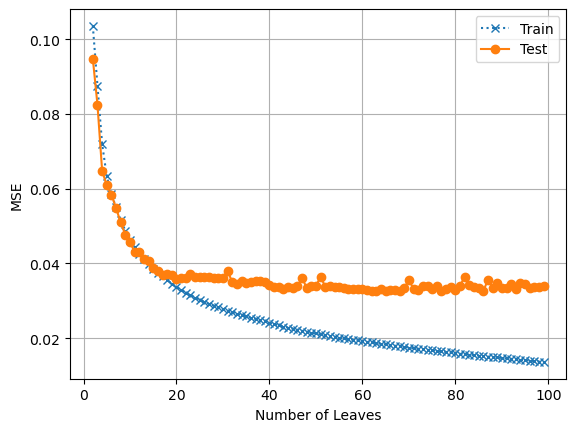

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error



errors = []

for max_leaves in range(2,100):
    # train and predict
    dt = DecisionTreeRegressor(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)
    print(dt.score(X_test,y_test))

    # compute Accuracy
    train_acc = mean_squared_error(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc  = mean_squared_error(y_true=y_test,  y_pred=dt.predict(X_test))

    errors += [ [max_leaves, train_acc, test_acc] ]

errors = np.array(errors)

fig, ax = plt.subplots()
ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
ax.plot(errors[:,0], errors[:,2], "o-", label="Test")
ax.set_ylabel("MSE")
ax.set_xlabel("Number of Leaves")
ax.grid()
ax.legend();

In [3]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : range(1,100,10),
           "min_samples_leaf":range(1,100,10),
           "max_features":["log2","sqrt",None],
            } 

In [4]:
from sklearn.model_selection import GridSearchCV


tuning_model=GridSearchCV(dt,param_grid=parameters,scoring='neg_mean_squared_error',error_score='raise',cv=3,n_jobs=-1)
tuning_model.fit(X_train,y_train)
tuning_model.best_params_


{'max_depth': 11,
 'max_features': None,
 'min_samples_leaf': 11,
 'splitter': 'random'}

In [5]:
tuning_model.best_params_

{'max_depth': 11,
 'max_features': None,
 'min_samples_leaf': 11,
 'splitter': 'random'}

In [6]:
parameters= tuning_model.best_params_
dt = DecisionTreeRegressor(max_depth= parameters['max_depth'],
                           max_features=parameters['max_features'],
                           min_samples_leaf=parameters['min_samples_leaf'],
                           splitter=parameters['splitter'])
dt.fit(X_train,y_train)
print(dt.score(X_test,y_test))


0.7881528260193921


In [7]:
from ipynb.fs.defs.data_analysis import save_regressor
save_regressor(dt)

In [8]:
from ipynb.fs.defs.data_analysis import model_analysis
data = model_analysis(dt)
data

enter
                       Score      Variance           MSE
name                                                    
DecisionTreeRegressor  0.811  5.944220e+09  1.259977e+09
KNeighborsRegressor    0.817  5.671486e+09  1.402773e+09
LGBMRegressor          0.883  5.837807e+09  8.596156e+08
LinearRegression       0.846  5.482299e+09  1.372148e+09
RandomForestRegressor  0.891  5.651420e+09  8.100146e+08
                       Score      Variance           MSE
name                                                    
DecisionTreeRegressor  0.800  5.781312e+09  1.412329e+09
KNeighborsRegressor    0.291  4.999458e+09  4.721170e+09
LGBMRegressor          0.902  5.810056e+09  7.237563e+08
LinearRegression       0.846  5.481269e+09  1.456500e+09
RandomForestRegressor  0.902  5.527662e+09  7.257831e+08
                       Score      Variance           MSE
name                                                    
DecisionTreeRegressor  0.796  5.791097e+09  1.416795e+09
KNeighborsRegressor    0.